In [1]:
import pandas as pd
from pandas import DataFrame as DF
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### CSV読み込み

In [2]:
df = pd.read_csv("input\OnlineNewsPopularity.csv") #header=None, index_col=0
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### クリップボードの読み込み

In [ ]:
df = pd.read_clipboard() #header=None, index_col=0

### csvエクスポート

In [ ]:
df.to_csv("path/file_name.csv") #encoding="utf-8"

### クリップボードにコピー

In [ ]:
df.to_clipboard()

### 欠損値チェック


In [ ]:
#欠損値チェック

check_null = df.isnull().any().values.tolist()
check_null = [[col_lst[i],check_null[i]] for i in range(len(col_lst))]
check_null

### 列統計量参照

In [49]:
tokens = df["n_tokens_content"]
tokens.describe()

## カテゴリ型要素の count/unique/freq/stdなどを取得
# df.describe(exclude='number')

count    39644.000000
mean       546.514731
std        471.107508
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name: n_tokens_content, dtype: float64

In [50]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644,39644,39644,39644,39644,39644,39644,39644,39644,39644,...,39644,39644,39644,39644,39644,39644,39644,39644,39644,39644
mean,354.53,10.3987,546.515,0.548216,0.996469,0.689175,10.8837,3.29364,4.54414,1.24987,...,0.0954455,0.756728,-0.259524,-0.521944,-0.1075,0.282353,0.0714254,0.341843,0.156064,3395.38
std,214.164,2.11404,471.108,3.52071,5.23123,3.26482,11.332,3.85514,8.30943,4.10786,...,0.0713149,0.247786,0.127726,0.29029,0.095373,0.324247,0.26545,0.188791,0.226294,11627
min,8,2,0,0,0,0,0,0,0,0,...,0,0,-1,-1,-1,0,-1,0,0,1
25%,164,9,246,0.47087,1,0.625739,4,1,1,0,...,0.05,0.6,-0.328383,-0.7,-0.125,0,0,0.166667,0,946
50%,339,10,409,0.539226,1,0.690476,8,3,1,0,...,0.1,0.8,-0.253333,-0.5,-0.1,0.15,0,0.5,0,1400
75%,542,12,716,0.608696,1,0.75463,14,4,4,1,...,0.1,1,-0.186905,-0.3,-0.05,0.5,0.15,0.5,0.25,2800
max,731,23,8474,701,1042,650,304,116,128,91,...,1,1,0,0,0,1,1,0.5,1,843300


### ビニング処理

In [3]:
tokens = df["n_tokens_content"]
tokens.describe()

count    39644.000000
mean       546.514731
std        471.107508
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name: n_tokens_content, dtype: float64

In [ ]:
# 最大値と最小値の間を等間隔で分割
# 第二引数binsに整数値を指定すると分割数（ビン数）の指定になる。最大値と最小値の間を等間隔で分割する。
tokens_cut = pd.cut(tokens, 10)
# 引数labelsでラベルを指定できる。デフォルトはlabels=Noneで、これまでの例の通り(a, b]。
# labels=Falseとすると整数値のインデックス（0始まりの連番）になる。
# tokens_cut = pd.cut(tokens, 4, labels=False)


# 境界値を指定して分割
# 第二引数binsにリストを指定すると、リストの要素を境界値として分割される。範囲外の値はNaNとなる。
tokens_cut = pd.cut(tokens, [0, 10, 50, 100])


print(tokens_cut)

In [5]:
# ビンに含まれる個数（要素数）をカウント: value_counts()
cut, bins = pd.cut(tokens, 100, retbins=True)
bins = [int(num) for num in bins][1:]  #値を整数化、binsの最小値は境界ではないので削除

counts = pd.cut(tokens, 100, labels=bins).value_counts(normalize=True) #カウント,合計を1に正規化

cts_lst = counts.values.tolist() #カウントのリスト化

cts_df = DF(list(zip(bins,cts_lst)),
            columns=["bins", "counts"]
            )                                   #カウントとビンのリストからDFを作成


cts_df




,bins,counts
0,84,0.142998
1,169,0.139012
2,254,0.109525
3,338,0.086570
4,423,0.085259
...,...,...
95,8135,0.000000
96,8219,0.000000
97,8304,0.000000
98,8389,0.000000


In [ ]:
# 出現頻度カウント (合計を1に正規化)
df['col_1'].value_counts(normalize=True)

C:\Users\kyotn\Anaconda3\envs\data-science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


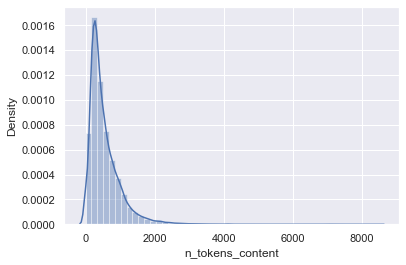

In [7]:
sns.set(style="darkgrid")
sns.distplot(tokens)
plt.show()

### ピボットテーブル

In [ ]:
omsa2 = omsa2[omsa2["区分"] != 20]

for code in cl:

    df_temp = omsa2[omsa2["商品コード_x"] == code]

    pt_temp = pd.pivot_table(df_temp, index=df_temp["受注日付"].dt.year, columns=df_temp["受注日付"].dt.month,
                             values="社内工数合計", aggfunc=np.sum)
    
    pt_temp.to_csv(f"チームワーク用データ1/製品別PT/工数/{code}.csv")

### クロス集計

In [ ]:
cross = pd.crosstab(df2["channel"], df2["daily"])
cross["sum_ind"] = cross.sum(axis=1).tolist()
cross.loc["sum_col"] = cross.sum(axis=0).tolist()
cross

### 外部結合

In [ ]:
df_c = pd.merge(df_a, df_b, on="col_name") # on←カラム名で結合キー指定

# 基本 (内部結合)
df = pd.merge(df, df_sub, on='key')

# 複数のカラムをキーとする
df = pd.merge(df, df_sub, on=['key_1', 'key_2'])

# 左結合
df = pd.merge(df, df_sub, on='key', how='left')

# 左右でカラム名が違うとき
df = pd.merge(df, df_sub, 
              left_on='key_left', right_on='key_right') \
       .drop('key_left', axis=1)  # キーが両方残るのでどちらか消す




# concat
## 基本 (縦に積む: カラムは各DataFrameの和集合
df = pd.concat([df_1, df_2, df_3])

## 横につなげる
df = pd.concat([df_1, df_2], axis=1)

## 各DataFrameに共通のカラムのみで積む
df = pd.concat([df_1, df_2, df_3], join='inner')

### groupbyでカウント

### データフレーム条件抽出

In [ ]:
# あるリストに含まれる要素を持つサンプルのみを抽出
df_ex = df[df["n_tokens_title"].isin([2,3,4])]

# あるリストに含まれない要素を持つサンプルのみを抽出
df_ex = df[~df["n_tokens_title"].isin([2,3,4])]

df_ex


# 基本
df[df.age >= 25]

# OR条件
df[(df.age <= 19) | (df.age >= 30)]

# AND条件
df[(df.age >= 25) & (df.age <= 34)]

## betweenでも書ける (あまり見ないが)
df[df['age'].between(25, 34)]

# IN
df[df.user_id.isin(target_user_list)]

# query記法: 賛否両論あるが個人的には好き
df.query('age >= 25') \
  .query('gender == "male"')

In [51]:
# 型による列選択
# 除外もできる
df.select_dtypes(
    include=['number', 'bool'],
    exclude=['object'])

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731,12,219,0.663594,1.0,0.815385,4,2,1,0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731,9,255,0.604743,1.0,0.791946,3,1,1,0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731,9,211,0.575130,1.0,0.663866,3,1,1,0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731,9,531,0.503788,1.0,0.665635,9,0,1,0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8,11,346,0.529052,1.0,0.684783,9,7,1,1,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8,12,328,0.696296,1.0,0.885057,9,7,3,48,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8,10,442,0.516355,1.0,0.644128,24,1,12,1,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8,6,682,0.539493,1.0,0.692661,10,1,1,0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


### 複数のカテゴリカルダミーを1つのカテゴリ変数にまとめる

In [ ]:
def back_ctgry(_df, ctgry_list, new_col_name):
    _df[new_col_name] = [j
                         for i in range(len(_df))
                         for j in ctgry_list
                         if _df.loc[i,j]==1]
    return _df

In [ ]:
cat1 = df_in.loc[:,"data_channel_is_tech":"data_channel_is_other"].columns.tolist()
# cat2 = df_in.loc[:,"data_channel_is_tech":"data_channel_is_other"].columns.tolist()

df1 = back_ctgry(df_in, cat1, "channel")
df1

### indexリセット

In [ ]:
# 基本
df = df.reset_index()

# 破壊的変更
df.reset_index(inplace=True)

# drop=Falseにするとindexが列として追加される
df.reset_index(drop=False, inplace=True)

### 列削除

In [ ]:
# 基本
df = df.drop(['col_1'], axis=1)

# 破壊的変更
df = df.drop(['col_1'], axis=1, inplace=True)

### 値の書き換え (apply / map)

In [ ]:
# Series各要素の書き換え: map

# 各要素に特定の処理
f_brackets = lambda x: '[{}]'.format(x)
df['col_1'].map(f_brackets)
# 0    [11]
# 1    [21]
# 2    [31]
# Name: col_1, dtype: object

# dictを渡して値の置換
df['priority'] = df['priority'].map({'yes': True, 'no': False})



# DataFrameの各行・各列の書き換え: apply
# 基本
df['col_1'].apply(lambda x: max(x))

# もちろん自身で定義した関数でも良い
df['col_1'].apply(lambda x: custom_func(x))

# 進捗を表示するときは
# from tqdm._tqdm_notebook import tqdm_notebook
df['col_1'].progress_apply(lambda x: custom_func(x))



# その他の書き換え (replace / np.where)
# replace
df['animal'] = df['animal'].replace('snake', 'python')

# np.where
df['logic'] = np.where(df['AAA'] > 5, 'high', 'low')

# np.where: 複雑ver.
condition_1 = (
    (df.title == 'Bird Measurer (Assessment)') & \
    (df.event_code == 4110)
)
condition_2 = (
    (df.title != 'Bird Measurer (Assessment)') & \
    (df.type == 'Assessment') & \
    (df.event_code == 4100)
)
df['win_code'] = np.where(condition_1 | condition_2, 1, 0)



df = pd.DataFrame({'a':[11, 21, 31],
                  'b':[12, 22, 32],
                  'c':[13, 23, 33],
                  'd':[14, 24, 34]})

f_oddeven = lambda x: 'odd' if x % 2 == 1 else 'even'
print(df.applymap(f_oddeven))
     a     b    c     d
0  odd  even  odd  even
1  odd  even  odd  even
2  odd  even  odd  even

### One-Hot Encoding

In [ ]:
# この DataFrame を処理する
#    name  gender
# 0  hoge    male
# 1  fuga     NaN
# 2  hage  female

# prefixを付けることでなんのカラムのOne-Hotかわかりやすくなる
tmp = pd.get_dummies(df['gender'], prefix='gender')
#    gender_female  gender_male
# 0              0            1
# 1              0            0
# 2              1            0

# 結合したあと元のカラムを削除する
df = df.join(tmp).drop('gender', axis=1)
#    name  gender_female  gender_male
# 0  hoge              0            1
# 1  fuga              0            0
# 2  hage              1            0

### Label Encoding